# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [2]:
# Set the file paths for the CSVs using the Path class from the pathlib library
MSFT = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\2\11-correlation-01\Resources\MSFT.csv'
SP500 = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\2\11-correlation-01\Resources\SP500.csv'

## 3. Read the CSVs into Pandas DataFrames.

In [3]:
# Read the data, set the `date` as a datetime index
MSFT_df = pd.read_csv(MSFT, index_col='date', infer_datetime_format=True, parse_dates=True)
SP500_df = pd.read_csv(SP500, index_col='date', infer_datetime_format=True, parse_dates=True)

## 4. Combine DataFrames and Sort the Index

In [9]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([MSFT_df, SP500_df], axis='columns', join='inner')
combined_df.head()

# Sort datetime index in ascending order (past to present). Display a few rows
combined_sort_df = combined_df.sort_values('date',ascending=True)
combined_sort_df

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.680,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.800,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.290,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.370,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.260,40.26,39.8100,1911.910034
...,...,...,...,...,...,...
2019-05-13,123.35,33944920,124.110,125.55,123.0400,2811.870117
2019-05-14,124.73,25266320,123.870,125.88,123.7000,2834.409912
2019-05-15,126.02,24722710,124.260,126.71,123.7000,2850.959961


## 5. Drop Extraneous Columns

In [12]:
# Drop extra columns and only leave the close columns and associated values
combined_sort_drp_df = combined_sort_df.drop(columns=['volume', 'open', 'high', 'low'])
combined_sort_drp_df

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 6. Rename Columns

In [14]:
# Rename the columns to match the corresponding stock
combined_sort_drp_df.columns = ['MSFT', 'SP500']
combined_sort_drp_df

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 7. Calculate Daily Returns

In [15]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_sort_drp_df.pct_change()
daily_returns

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988
...,...,...
2019-05-13,-0.029733,-0.024131
2019-05-14,0.011188,0.008016
2019-05-15,0.010342,0.005839


## 8. Calculate Covariance of MSFT returns vs. S&P 500 returns

In [16]:
# Calculate covariance of all daily returns of MSFT vs. S&P 500
covariance = daily_returns['MSFT'].cov(daily_returns['SP500'])
covariance

9.08483697106626e-05

## 9. Calculate Variance of MSFT Returns

In [17]:
# Calculate variance of all daily returns of MSFT vs. AAPL
variance = daily_returns['MSFT'].var()
variance

0.00021456328327532686

## 10. Calculate Beta of MSFT

In [18]:
# Calculate beta of all daily returns of MSFT
MFST_beta = covariance/variance
MFST_beta

0.42341060559781935

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

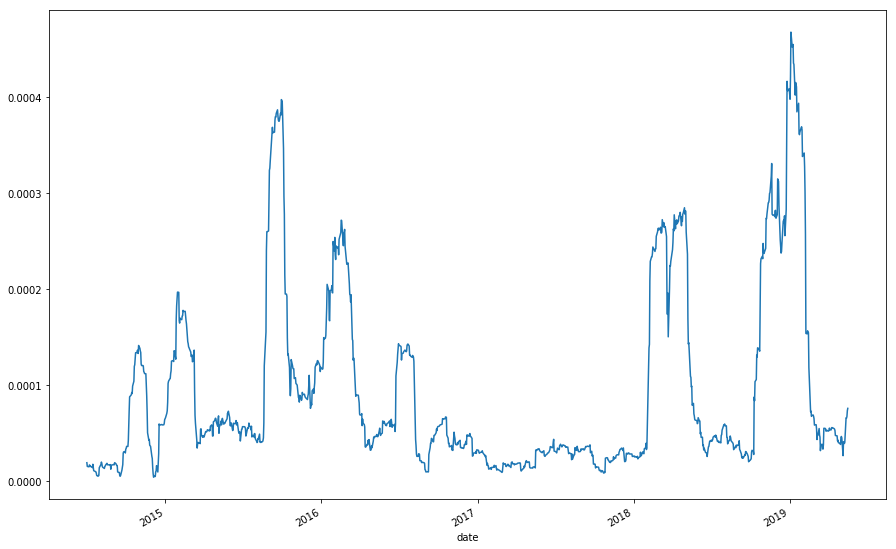

In [23]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
roll_cov = daily_returns['MSFT'].rolling(window=30).cov(daily_returns['SP500'])
roll_cov.plot(figsize=(15,10))

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

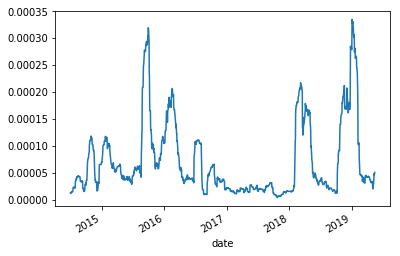

In [25]:
SP500_var = daily_returns['SP500'].rolling(window=30).var()
SP500_var.plot()

## 13. Calculate 30-Day Rolling Beta of MSFT

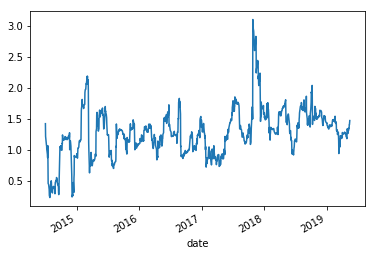

In [26]:
# Calculate 30-day rolling beta of MSFT and plot the data
beta_30day = roll_cov/SP500_var
beta_30day.plot()

## 14. Beta vs. Correlation

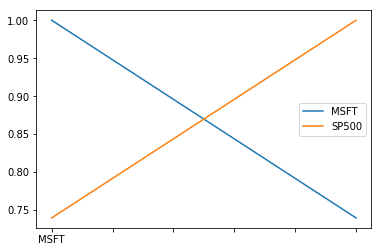

In [29]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
correlation = daily_returns.corr()
correlation.plot()

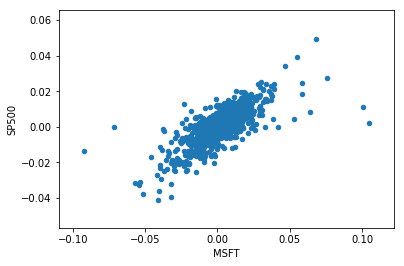

In [44]:
daily_returns.plot(kind='scatter', x='MSFT', y='SP500')

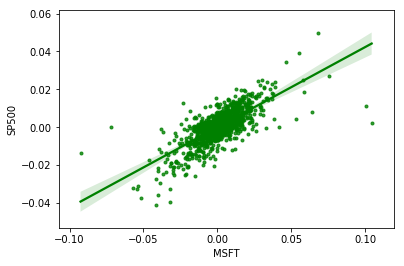

In [43]:
import seaborn as sns
x = daily_returns['MSFT']
y = daily_returns['SP500']
sns.regplot(x, y, color='g', data=daily_returns, marker='.')